In [289]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

plt.style.use('seaborn-white')


In [290]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [291]:
GPU_results = pd.read_csv("cuda_profiling_results_raw.csv")
GPU_results = GPU_results.drop("Correctness",axis=1)
GPU_results = GPU_results.drop("RunNumber",axis=1)

GPU_results.head()

,N,K,TimeShm,ThroughputShm,TimeNoShm,ThroughputNoShm
0,65536,1000,0.011791,2.991100e+04,0.007876,8.321397e+06
1,65536,1000,0.011791,5.558051e+06,0.007868,8.329406e+06
2,65536,1000,0.011848,5.531361e+06,0.007869,8.328875e+06
3,65536,1000,0.012112,5.410829e+06,0.007727,8.480943e+06
4,65536,1000,0.012139,5.398942e+06,0.007909,8.286723e+06


In [292]:
K = GPU_results["K"].unique()[0]
GPU_results = GPU_results.drop("K", axis=1)

In [293]:
GPU_results = GPU_results.groupby("N").mean()

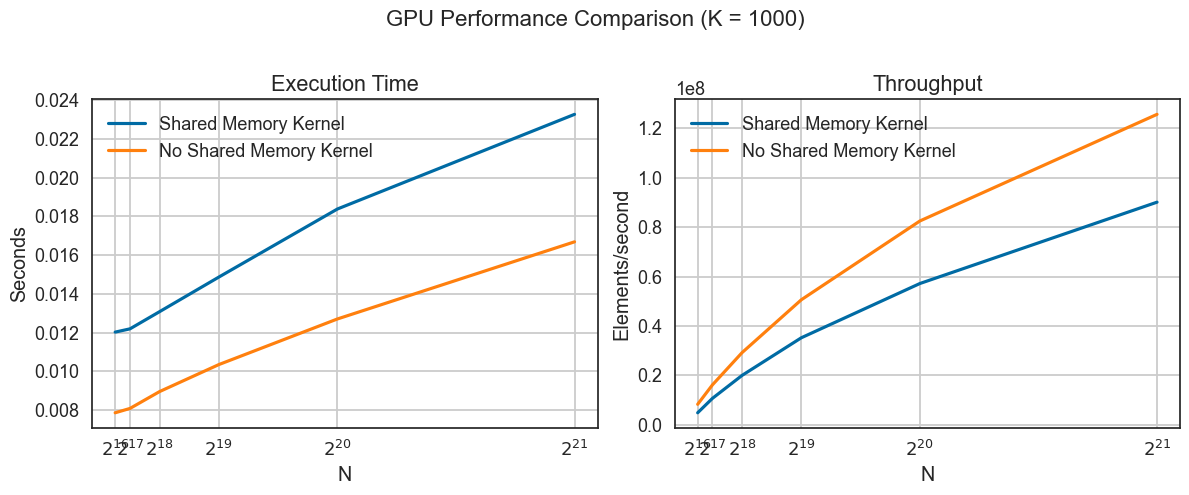

In [294]:
time_shared = GPU_results["TimeShm"].to_list()
time_noshared = GPU_results["TimeNoShm"].to_list()
throughput_shared = GPU_results["ThroughputShm"].to_list()
throughput_noshared = GPU_results["ThroughputNoShm"].to_list()
N = GPU_results.index.to_list()

x_ticks = N
x_labels = [r"$2^{{{:.0f}}}$".format(math.log(x, 2)) for x in N]
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Primo subplot: tempo di esecuzione
axs[0].plot(N, time_shared, label="Shared Memory Kernel")
axs[0].plot(N, time_noshared, label="No Shared Memory Kernel")
axs[0].set_xlabel("N")
axs[0].set_ylabel("Seconds")
axs[0].set_xticks(x_ticks)
axs[0].set_xticklabels(x_labels)
axs[0].set_title("Execution Time")
axs[0].legend()
axs[0].grid(True)

# Secondo subplot: throughput
axs[1].plot(N, throughput_shared, label="Shared Memory Kernel")
axs[1].plot(N, throughput_noshared, label="No Shared Memory Kernel")
axs[1].set_xlabel("N")
axs[1].set_ylabel("Elements/second")
axs[1].set_xticks(x_ticks)
axs[1].set_xticklabels(x_labels)
axs[1].set_title("Throughput")
axs[1].legend()
axs[1].grid(True)

fig.suptitle("GPU Performance Comparison (K = 1000)", fontsize=16)  # Titolo complessivo
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Lascia spazio per il titolo sopra
plt.savefig("cuda_graph.png")

plt.show()


In [295]:
openmp_comparison = pd.read_csv("profiling_hard_scaling_omp.csv")
openmp_comparison.head()

,N,K,SetOMPThreads,RunNumber,Time,Throughput,ReportedThreads
0,1048576,1000,1,1,23.112128,45369.081194,1
1,1048576,1000,1,2,32.276883,32486.903813,1
2,1048576,1000,1,3,22.895250,45798.845307,1
3,1048576,1000,1,4,31.809408,32964.335283,1
4,1048576,1000,1,5,22.953416,45682.785516,1


In [296]:
hard_scaling_x = openmp_comparison["ReportedThreads"].unique().tolist()
openmp_comparison = openmp_comparison.groupby("ReportedThreads").mean()
thr_per_thread = openmp_comparison["Throughput"].to_list()
hard_scaling_y = openmp_comparison["Time"].to_list()

In [297]:
openmp_comparison = pd.read_csv("profiling_soft_scaling_omp.csv")
openmp_comparison

soft_scaling_x = openmp_comparison["ReportedThreads"].unique().tolist()
openmp_comparison = openmp_comparison.groupby("ReportedThreads").mean()
soft_scaling_y = openmp_comparison["Time"].to_list()

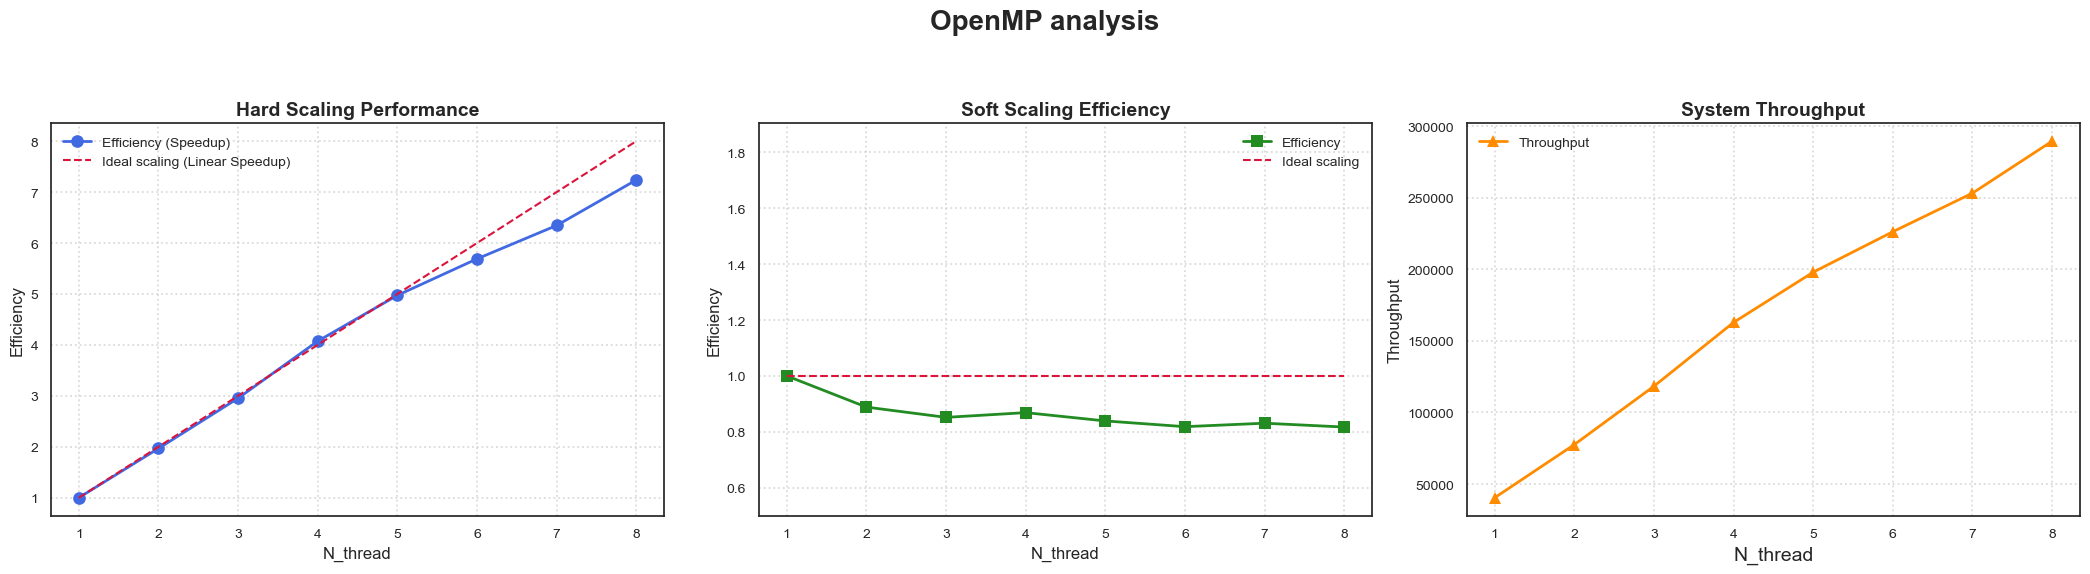

In [307]:
# Stile per grafici più carini

# Creazione della figura e dei 3 subplot (assi) in orizzontale
# figsize=(larghezza, altezza) in pollici
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 6)) # Aumentata larghezza per 3 plot

# --- Grafico 1: Hard Scaling Efficiency ---
ax1 = axes[0]
ax1.plot(hard_scaling_x, [hard_scaling_y[0] / t for t in hard_scaling_y], label="Efficiency (Speedup)", marker='o', linestyle='-', color='royalblue', linewidth=2)
ax1.plot(hard_scaling_x, hard_scaling_x, label="Ideal scaling (Linear Speedup)", linestyle='--', color='crimson', linewidth=1.5)
ax1.grid(True, linestyle=':', alpha=0.7)
ax1.legend(fontsize=10)
ax1.set_xlabel("N_thread", fontsize=12)
ax1.set_ylabel("Efficiency", fontsize=12) # Chiarito cosa si intende per "Efficiency" qui
ax1.set_title("Hard Scaling Performance", fontsize=14, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=10)

# --- Grafico 2: Soft Scaling Efficiency ---
ax2 = axes[1]
ax2.plot(soft_scaling_x, [soft_scaling_y[0] / t for t in soft_scaling_y], label="Efficiency", marker='s', linestyle='-', color='forestgreen', linewidth=2)
ax2.plot(soft_scaling_x, [1]*len(soft_scaling_x), label="Ideal scaling", linestyle='--', color='crimson', linewidth=1.5)
ax2.grid(True, linestyle=':', alpha=0.7)
ax2.legend(fontsize=10)
ax2.set_xlabel("N_thread", fontsize=12)
ax2.set_ylabel("Efficiency", fontsize=12) # Chiarito cosa si intende per "Efficiency" qui
ax2.set_title("Soft Scaling Efficiency", fontsize=14, fontweight='bold')
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.set_ylim(bottom=min(0.5, min(soft_scaling_y)*0.9), top=max(1.1, max(soft_scaling_y)*1.1)) # Assicura che 1.0 sia visibile

# --- Grafico 3: Throughput ---
ax3 = axes[2]
ax3.plot(hard_scaling_x, thr_per_thread, label="Throughput", marker='^', linestyle='-', color='darkorange', linewidth=2)
ax3.grid(True, linestyle=':', alpha=0.7)
ax3.legend(fontsize=10)
ax3.set_xlabel("N_thread", fontsize=14)
ax3.set_ylabel("Throughput", fontsize=12) # Corretto da "Efficiency"
ax3.set_title("System Throughput", fontsize=14, fontweight='bold')
ax3.tick_params(axis='both', which='major', labelsize=10)

# Titolo grosso per l'intera figura
fig.suptitle("OpenMP analysis", fontsize=20, fontweight='bold')

# Aggiusta il layout per evitare sovrapposizioni e fare spazio al suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.92]) # rect=[left, bottom, right, top]

plt.savefig("openmp_graphs.png")
# Mostra il grafico combinato
plt.show()


In [299]:
openmp_comparison = pd.read_csv("profiling_N_scaling_omp.csv")
threads = openmp_comparison["ReportedThreads"].unique().tolist()
datasets = []
for t in threads:
    datasets.append(openmp_comparison[openmp_comparison["ReportedThreads"] == t])

In [300]:
x_labels = [r"$2^{{{:.0f}}}$".format(math.log(x, 2)) for x in datasets[0]["N"].unique().tolist()]
times_1_thread = datasets[0].groupby("N").mean()["Time"].tolist()
times_8_thread = datasets[1].groupby("N").mean()["Time"].tolist()
times_16_thread = datasets[2].groupby("N").mean()["Time"].tolist()

In [301]:
speedup_shared_1 = [t1 / ts for ts,t1 in zip(time_shared, times_1_thread)]
speedup_noshared_1 = [t1 / ts for ts,t1 in zip(time_noshared, times_1_thread)]

speedup_shared_8 = [t1 / ts for ts,t1 in zip(time_shared, times_8_thread)]
speedup_noshared_8 = [t1 / ts for ts,t1 in zip(time_noshared, times_8_thread)]

speedup_shared_16 = [t1 / ts for ts,t1 in zip(time_shared, times_16_thread)]
speedup_noshared_16 = [t1 / ts for ts,t1 in zip(time_noshared, times_16_thread)]

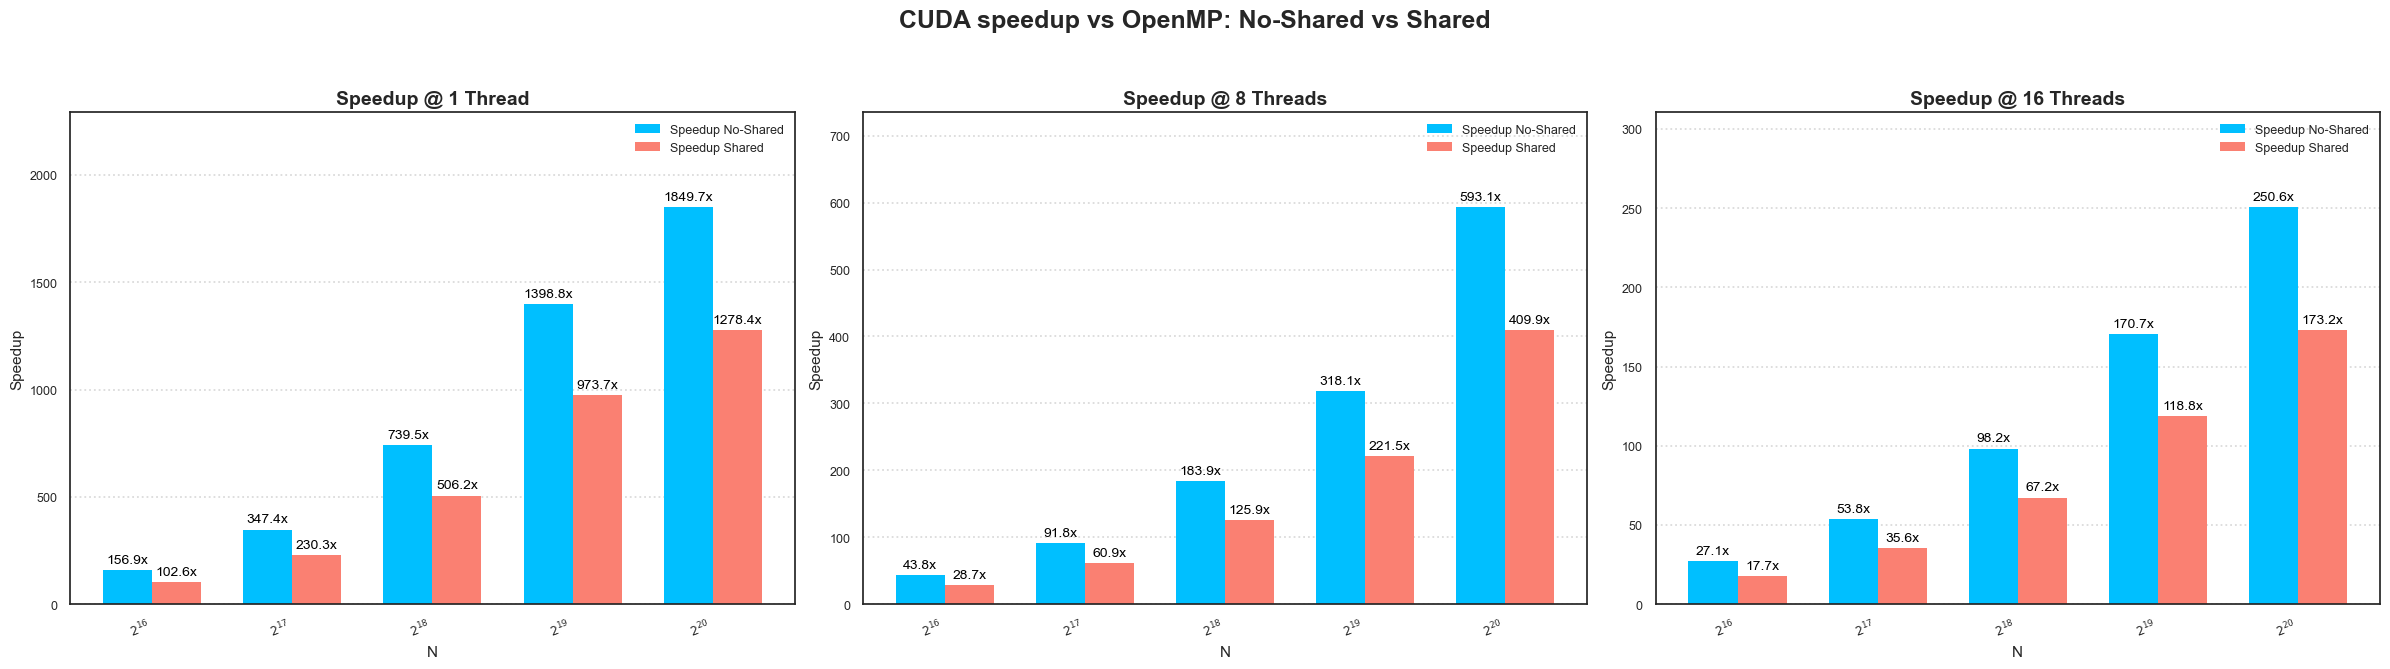

In [303]:
NUM_DECIMALS_IN_LABEL = 1 # Quanti decimali mostrare sull'etichetta della barra (es. 156.9x)
BAR_LABEL_FONTSIZE = 10   # Dimensione del font per le etichette sulle barre
BAR_LABEL_OFFSET_FACTOR = 0.01 # Fattore per l'offset verticale delle etichette
Y_AXIS_TOP_PADDING_FACTOR = 1.18 # Fattore per aumentare il limite superiore dell'asse Y (1.10 = 10% padding)

# Funzione per aggiungere etichette numeriche sopra le barre
def add_bar_value_labels(ax, bar_container_list):
    """
    Aggiunge un'etichetta testuale sopra ogni barra.
    L'etichetta mostra il valore della barra (altezza), arrotondato, con una 'x' alla fine.
    """
    for bar_group in bar_container_list: # Itera sui gruppi di barre (es. 'noshared', 'shared')
        for bar_element in bar_group:    # Itera su ogni singola barra nel gruppo
            bar_height = bar_element.get_height() # VALORE ESATTO DEL DATO PER QUESTA BARRA

            # Crea l'etichetta: valore arrotondato + 'x'
            label_text = f"{round(bar_height, NUM_DECIMALS_IN_LABEL)}x"

            # Calcola un piccolo offset verticale per posizionare il testo sopra la barra
            y_axis_max = ax.get_ylim()[1]
            vertical_offset = y_axis_max * BAR_LABEL_OFFSET_FACTOR

            ax.text(
                x=bar_element.get_x() + bar_element.get_width() / 2.0, # Centro orizzontale della barra
                y=bar_height + vertical_offset,                        # Appena sopra la barra
                s=label_text,                                          # Testo dell'etichetta
                ha='center',                                           # Allineamento orizzontale
                va='bottom',                                           # Allineamento verticale
                fontsize=BAR_LABEL_FONTSIZE,
                color='black'
            )

# Crea la figura principale e i 3 subplot (assi) in orizzontale
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 7)) # (larghezza, altezza) in pollici

# Definizioni per ogni subplot
subplot_configurations = [
    {"title": "Speedup @ 1 Thread", "data_noshared": speedup_noshared_1, "data_shared": speedup_shared_1},
    {"title": "Speedup @ 8 Threads", "data_noshared": speedup_noshared_8, "data_shared": speedup_shared_8},
    {"title": "Speedup @ 16 Threads", "data_noshared": speedup_noshared_16, "data_shared": speedup_shared_16},
]

bar_width = 0.35  # Larghezza di una singola barra
x_positions = np.arange(len(x_labels))  # Posizioni [0, 1, 2, 3, 4] per i gruppi di barre

# Itera su ogni subplot per disegnarlo
for i, ax_subplot in enumerate(axes):
    current_config = subplot_configurations[i]

    # Disegna le barre "No-Shared" (a sinistra nel gruppo)
    bars_noshared = ax_subplot.bar(
        x_positions - bar_width / 2,
        current_config["data_noshared"],
        bar_width,
        label='Speedup No-Shared',
        color='deepskyblue'
    )

    # Disegna le barre "Shared" (a destra nel gruppo)
    bars_shared = ax_subplot.bar(
        x_positions + bar_width / 2,
        current_config["data_shared"],
        bar_width,
        label='Speedup Shared',
        color='salmon'
    )

    # Impostazioni del subplot (titolo, etichette assi, legenda, ecc.)
    ax_subplot.set_title(current_config["title"], fontsize=14, fontweight='bold')
    ax_subplot.set_ylabel("Speedup", fontsize=11)
    ax_subplot.set_xlabel("N", fontsize=11)
    ax_subplot.set_xticks(x_positions)
    ax_subplot.set_xticklabels(x_labels, rotation=20, ha="right", fontsize=9) # Ruota etichette per leggibilità
    ax_subplot.legend(fontsize=9)
    ax_subplot.grid(True, axis='y', linestyle=':', alpha=0.7) # Griglia solo orizzontale
    ax_subplot.tick_params(axis='both', which='major', labelsize=9)

    # Aggiungi le etichette numeriche sopra le barre
    add_bar_value_labels(ax_subplot, [bars_noshared, bars_shared])

    # Aggiusta il limite superiore dell'asse Y per fare spazio alle etichette
    # Questo è cruciale per evitare che le etichette vengano tagliate
    current_y_limits = ax_subplot.get_ylim()
    ax_subplot.set_ylim(current_y_limits[0], current_y_limits[1] * Y_AXIS_TOP_PADDING_FACTOR)


# Titolo grosso per l'intera figura
fig.suptitle("CUDA speedup vs OpenMP: No-Shared vs Shared", fontsize=18, fontweight='bold')

# Aggiusta automaticamente il layout per evitare sovrapposizioni
plt.tight_layout(rect=[0, 0.03, 1, 0.94]) # rect=[left, bottom, right, top] per fare spazio al suptitle

# Mostra il grafico
plt.savefig("graph_speedup_cuda_vs_openmp.png")
plt.show()